In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
grid_size = (10, 10)
rewards = np.zeros(grid_size)
rewards[0, 8] = -500
rewards[8, 6] = -100
rewards[5, 9] = 1000
illegal_positions = {(1, 2), (2, 2), (3, 2), (4, 2), (3, 6), (4, 6), (5, 6), (6, 6), (5, 7), (6, 7)}
terminal_pos = {(5, 9)}


In [4]:
num_states = np.prod(grid_size)
num_actions = 5  # Add a "Wait" action
Q_matrix_old = np.random.rand(num_states, num_actions)
Q_matrix_current = Q_matrix_old.copy()
learning_rate = 0.1
discount = 0.9
epochs = 1000
convergence_threshold = 1e-6
error_rates = []
convergence_time = None
f2_house = 0.35
start_positions = [(0, i) for i in range(2)] + [(9, i) for i in range(2)]

In [5]:
for epoch in range(epochs):
    start_pos = random.choice(start_positions)
    position  = start_pos
    robber_position = (5, 9)  

    while position not in terminal_pos:
        move_direction = random.choice(range(5))  
        current_state_q_index = position[0] * grid_size[1] + position[1]
        new_position = position

        if move_direction == 0:  
            new_position = (position[0] - 1, position[1])
        elif move_direction == 1:  
            new_position = (position[0], position[1] - 1)
        elif move_direction == 2:  
            new_position = (position[0] + 1, position[1])
        elif move_direction == 3:  
            new_position = (position[0], position[1] + 1)
        elif move_direction == 4: 
            pass

        if (
            new_position[0] < 0 or new_position[0] >= grid_size[0] or
            new_position[1] < 0 or new_position[1] >= grid_size[1] or
            new_position in illegal_positions
        ):
            new_position = position

        old_Q = Q_matrix_old[current_state_q_index][move_direction]
        new_state_reward = rewards[new_position[0], new_position[1]]

        Q_matrix_current[current_state_q_index][move_direction] = \
            old_Q + learning_rate * (new_state_reward + discount * np.max(Q_matrix_old[new_position[0] * grid_size[1] + new_position[1]]) - old_Q)

        
        if random.random() < f2_house:
            
            robber_position = (5, 2)
        else:
            
            possible_moves = [(robber_position[0] - 1, robber_position[1]), (robber_position[0], robber_position[1] - 1),
                              (robber_position[0] + 1, robber_position[1]), (robber_position[0], robber_position[1] + 1)]
            possible_moves = [move for move in possible_moves if
                              move[0] >= 0 and move[0] < grid_size[0] and
                              move[1] >= 0 and move[1] < grid_size[1] and
                              move not in illegal_positions]
            robber_position = random.choice(possible_moves)
        
        if position == robber_position:
            break

    if epoch > 0:
        error_rate = np.mean(np.abs(Q_matrix_current - Q_matrix_old))
        error_rates.append(error_rate)

        if error_rate < convergence_threshold and convergence_time is None:
            convergence_time = epoch

    Q_matrix_old = np.copy(Q_matrix_current)

In [6]:
robber_caught = position == robber_position
if robber_caught:
    print("The bounty hunter has caught the robber!")
else:
    print("The bounty hunter could not catch the robber.")

The bounty hunter has caught the robber!


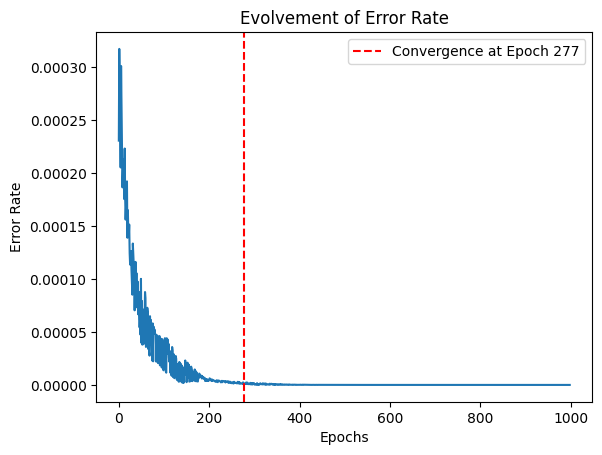

In [7]:
plt.plot(error_rates)
plt.title("Evolvement of Error Rate")
plt.xlabel("Epochs")
plt.ylabel("Error Rate")
if convergence_time is not None:
    plt.axvline(x=convergence_time, color='r', linestyle='--', label=f'Convergence at Epoch {convergence_time}')
    plt.legend()
plt.show()